In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("icecube_10year_ps/irfs/IC59_smearing.csv", 'r') as f1:
    lines = f1.readlines()
    f1.close()
content=[]
column=lines[0].split()
column.pop(0)
for line in lines[1:]:
    
    content.append(line.split())

smear = pd.DataFrame(content, columns = column)
smear

with open("icecube_10year_ps/uptime/IC59_exp.csv", 'r') as f2:
    lines = f2.readlines()
    f2.close()

content=[]
column=lines[0].split()
column.pop(0)
for line in lines[1:]:
    
    content.append(line.split())

uptime = pd.DataFrame(content, columns = column)

upt_ms = [float(86400000)*(float(uptime['MJD_stop[days]'][i]) - float(uptime['MJD_start[days]'][i])) for i in range(0,len(uptime['MJD_stop[days]']))]
len(upt_ms)


In [9]:
filenamewithpath="icecube_10year_ps/irfs/IC79_effectiveArea.csv"
with open(filenamewithpath, 'r') as f2:
    lines = f2.readlines()
    f2.close()

content=[]
column=lines[0].split()
column.pop(0)
for line in lines[1:]:
    
    content.append(line.split())

aeff = pd.DataFrame(content, columns = column)
aeff

,log10(E_nu/GeV)_min,log10(E_nu/GeV)_max,Dec_nu_min[deg],Dec_nu_max[deg],A_Eff[cm^2]
0,2.00,2.20,-90.00,-73.74,0.00
1,2.20,2.40,-90.00,-73.74,0.00
2,2.40,2.60,-90.00,-73.74,0.00
3,2.60,2.80,-90.00,-73.74,0.00
4,2.80,3.00,-90.00,-73.74,0.00
...,...,...,...,...,...
1995,9.00,9.20,73.74,90.00,0.00
1996,9.20,9.40,73.74,90.00,0.00
1997,9.40,9.60,73.74,90.00,0.00
1998,9.60,9.80,73.74,90.00,0.00


In [10]:
dloge = [float(aeff['log10(E_nu/GeV)_max'][i]) -float((aeff['log10(E_nu/GeV)_min'][i])) for i in range(0,len(aeff['log10(E_nu/GeV)_max']))] #

de = [pow(10,float(aeff['log10(E_nu/GeV)_max'][i])) - pow(10,float((aeff['log10(E_nu/GeV)_min'][i]))) for i in range(0,len(aeff['log10(E_nu/GeV)_max']))]

ddec = [float(aeff['Dec_nu_max[deg]'][i]) - float((aeff['Dec_nu_min[deg]'][i])) for i in range(0,len(aeff['Dec_nu_max[deg]']))]


e = [de[i]/dloge[i] for i in range(0,len(de))]

eff_a = [float(i) for i in aeff['A_Eff[cm^2]']]

ee_s = [((pow(10,float(aeff['log10(E_nu/GeV)_max'][i])) + pow(10,float((aeff['log10(E_nu/GeV)_min'][i]))))/2.0) for i in range(0,len(aeff['log10(E_nu/GeV)_max']))]

frac  = [float(i) for i in smear['Fractional_Counts']]

In [11]:
yax = [eff_a[i] * e[i] * ddec[i]/dloge[i] for i in range(0, len(dloge))]
len(yax)

2000

In [12]:
y = [max(yax[i:40+i]) for i in range(0,2000,40)]
x = [e[yax.index(max(yax[i:40+i]))] for i in range(0,2000,40)]


In [13]:



a = [(x[i],y[i]) for i in range(0, len(y))]
a = list(set(a))


for i in range(len(a)):

    # loop to compare array elements
    for j in range(0, len(a) - i - 1):

      # compare two adjacent elements
      # change > to < to sort in descending order
      if a[j][0] > a[j + 1][0]:

        # swapping elements if elements
        # are not in the intended order
        temp = a[j]
        a[j] = a[j+1]
        a[j+1] = temp

x = [a[i][0] for i in range(0, len(a))]
y = [a[i][1] for i in range(0, len(a))]
a

[(4634966.195242337, 24992829143411.48),
 (73459263.70126961, 95228809909749.38),
 (73459263.70126961, 433492574597498.44),
 (116425086.96334791, 1751188927288388.2),
 (116425086.96334791, 28414820122309.375),
 (292446596.2305565, 159191355209093.62),
 (292446596.2305565, 876617112063640.0),
 (292446596.2305565, 2959700780993709.5),
 (463496619.5242331, 372778142976231.06),
 (463496619.5242331, 1.6293534219740208e+16),
 (463496619.5242331, 16516714782902.967),
 (734592637.012696, 334082991716898.0),
 (734592637.012696, 59327680725006.04),
 (734592637.012696, 7.83512098053493e+16),
 (734592637.012696, 258201033418240.6),
 (734592637.012696, 124741416270215.1),
 (734592637.012696, 1388541228602413.0),
 (734592637.012696, 8264113120943372.0),
 (1164250869.633481, 3.3745079940041084e+16),
 (1164250869.633481, 497781219442970.3),
 (1164250869.633481, 163521364306011.75),
 (1845213277.5990348, 4.882530562161672e+17),
 (1845213277.5990348, 8.522239503441027e+17),
 (1845213277.5990348, 5.55403

TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

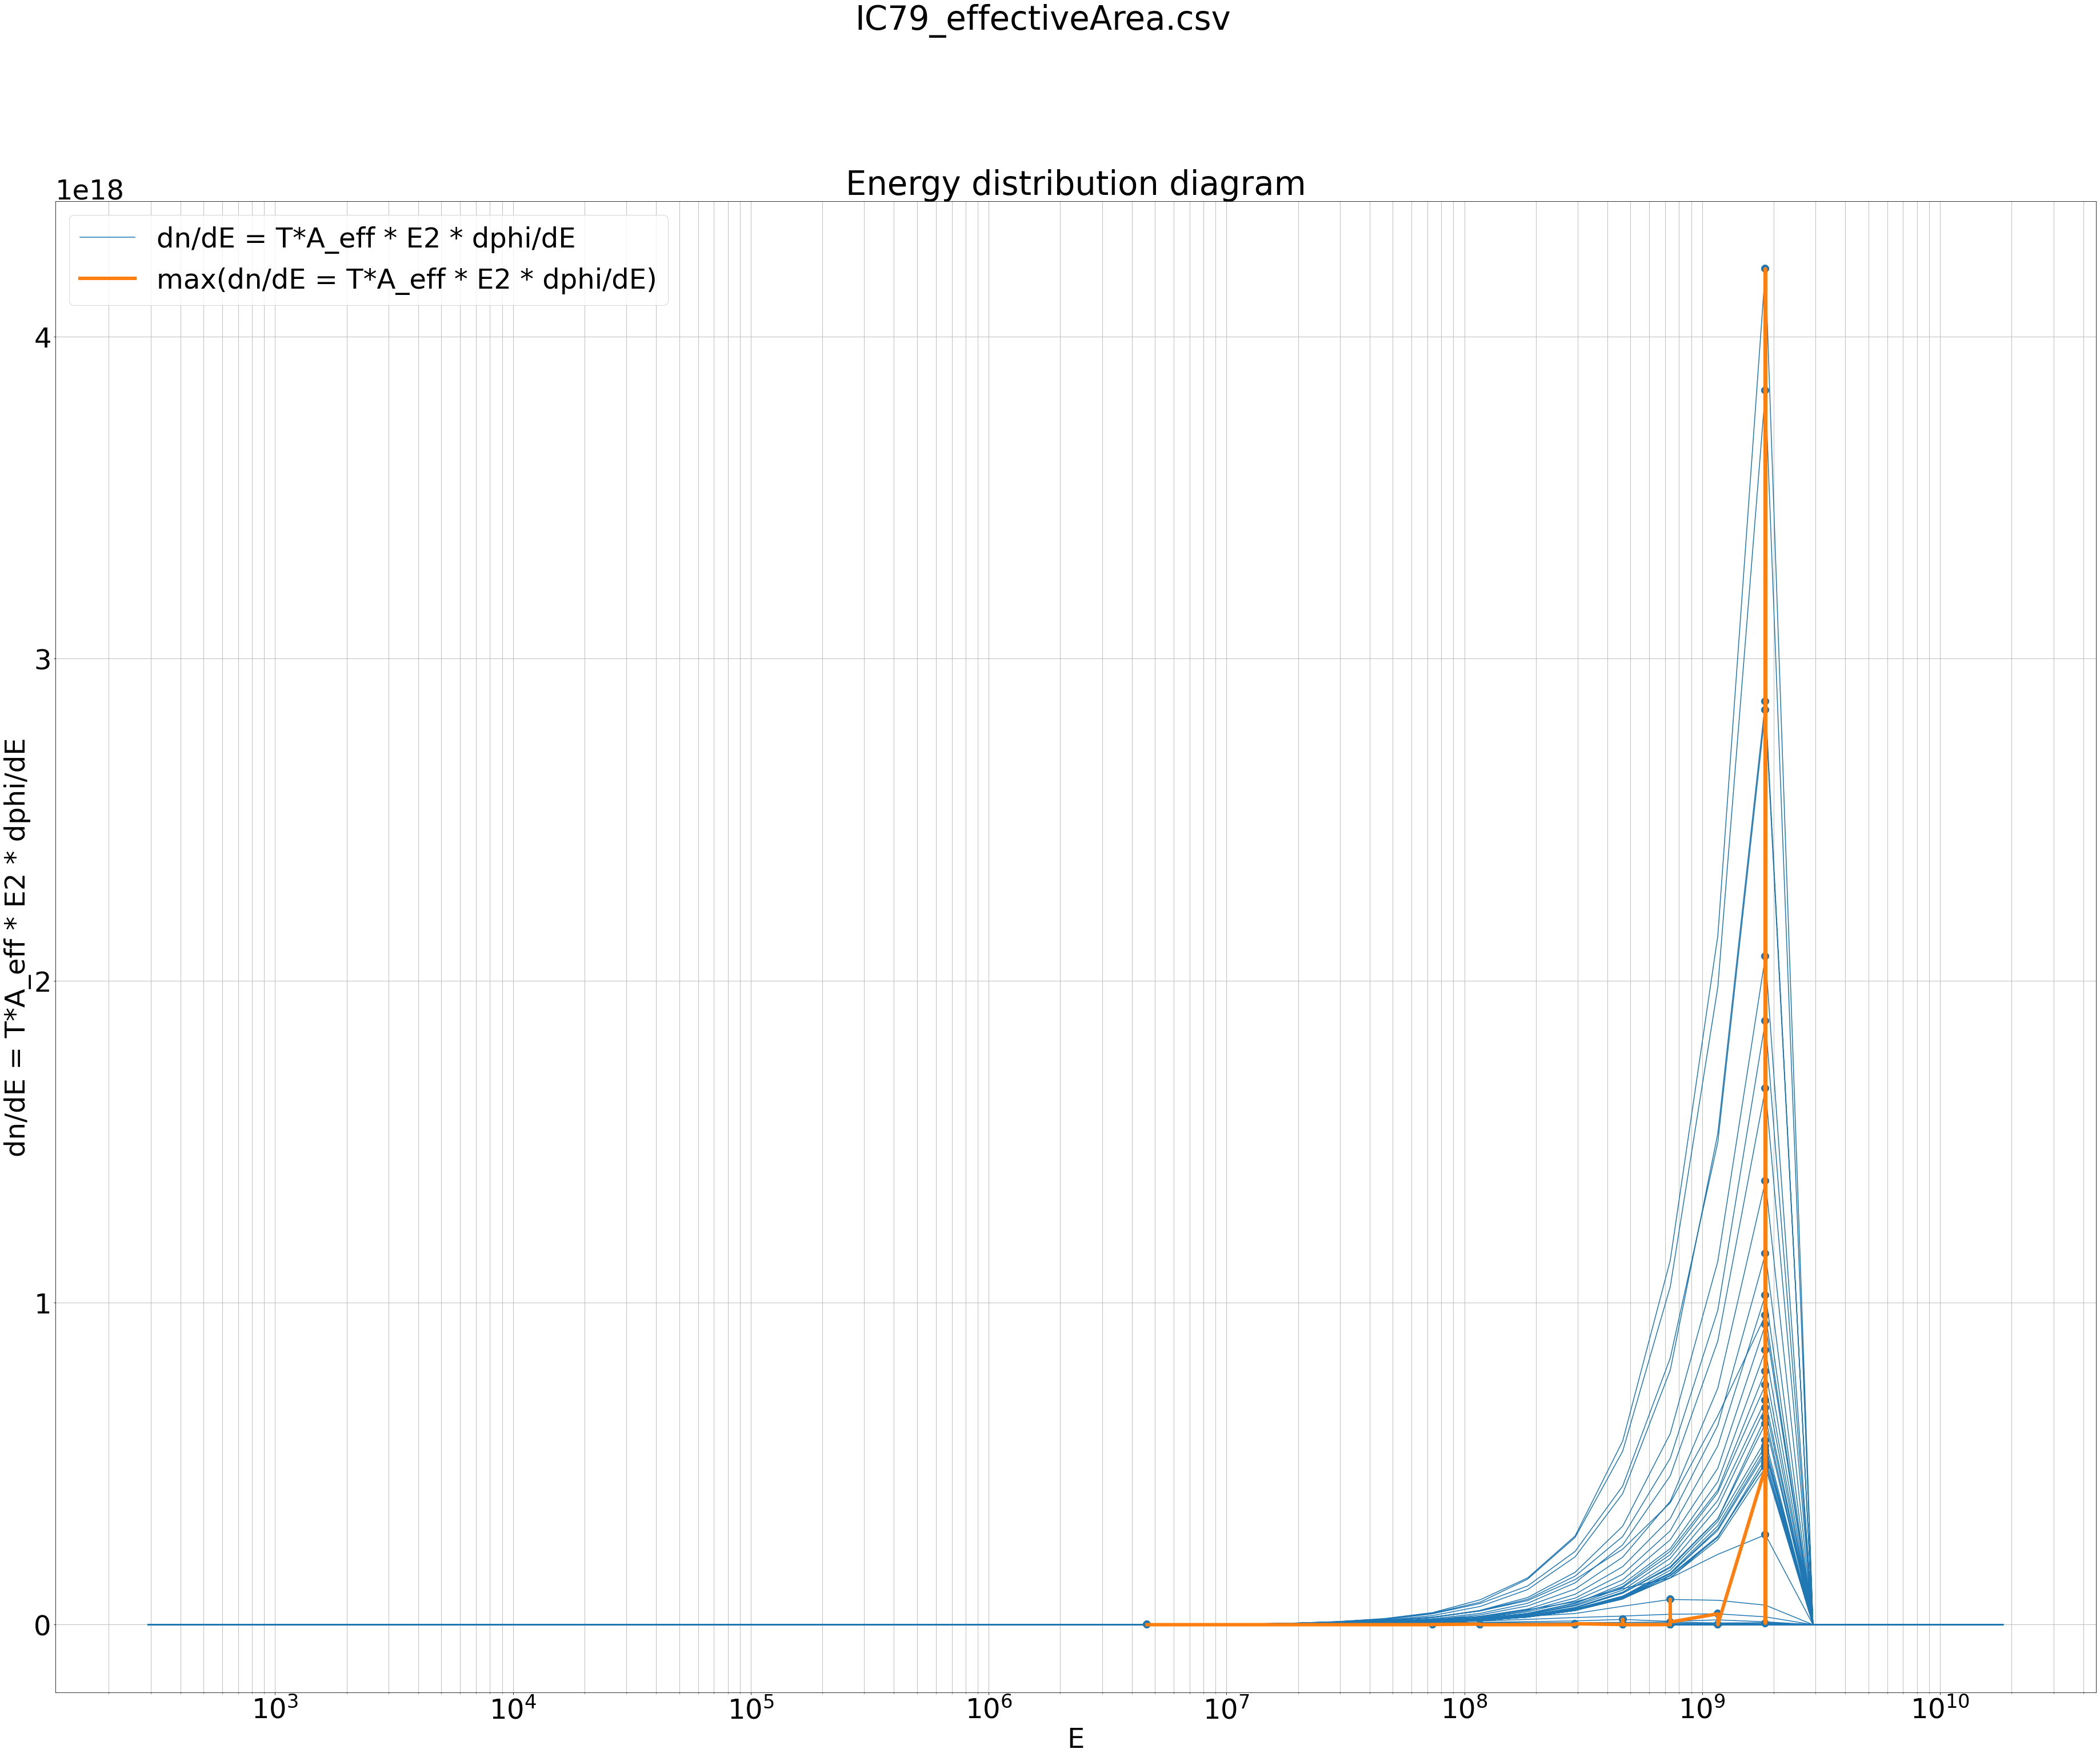

In [24]:
plt.figure(figsize=(64,48))
plt.rcParams.update({'font.size': 48})
plt.xlabel("E")
plt.xscale('log')
plt.ylabel("dn/dE = T*A_eff * E2 * dphi/dE")
plt.title("Energy distribution diagram")
plt.plot(e,yax, label='dn/dE = T*A_eff * E2 * dphi/dE')
plt.scatter(x,y, marker='P', lw = 8 )
plt.plot(x,y, lw = 6,label = 'max(dn/dE = T*A_eff * E2 * dphi/dE)')
plt.suptitle(filenamewithpath.replace('icecube_10year_ps/irfs/',''))
plt.grid(True, which='both')
plt.legend(loc = 'best')
plt.savefig(filenamewithpath.replace('icecube_10year_ps/irfs/','').replace('.csv','j.png'))